In [59]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import pipeline
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn import neighbors, metrics, model_selection
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

In [3]:
datos = pd.read_csv('online_shoppers_intention.csv')

datos_ok = datos.copy()
print(datos_ok.head())
categorico = ['Month','Weekend','VisitorType','Revenue']



for i,val in enumerate(datos_ok.columns):
    if val in categorico:
        labels = datos_ok[val].astype('category').cat.categories.tolist()
        dict_make = {val : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        datos_ok[val].replace(dict_make[val], inplace=True)

X_all = np.array(datos_ok.drop(columns = 'Revenue').copy())
y_all = np.array(pd.factorize(datos_ok['Revenue'])[0])

   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
## Month,VisitorType,Weekend.

Eliminamos los ejemplos con valores desconocidos

In [5]:
mascara = np.isnan(X_all)
mascara = np.sum(mascara,axis=1).reshape(-1,1).astype("bool")
mascara = mascara == False

X = X_all[mascara.flatten()]
y = y_all[mascara.flatten()]
print('se ha eliminado', len(X_all)-len(X),'ejemplos.')

se ha eliminado 14 ejemplos.


Visualizamos el numero de elementos de cada clase

In [6]:
Xpos = X[y == 1]
Xneg = X[y == 0]
print('hay',len(Xpos),'positivos')
print('hay',len(Xneg),'negativos')

hay 1908 positivos
hay 10408 negativos


# Entrenamiento con datos sin procesar

entrenamos un KNN con los datos sin procesar:

In [7]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainKNN = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainKNN))

predTest = clf.predict(X_test)
accTestKNN = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestKNN))

El rendimiento en entrenamiento con todas las variables es el 89.37%
El rendimiento en test con todas las variables es el 86.25%


entrenamos un arbol de desicion con los datos sin procesar:

In [8]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainDT = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDT))

predTest = clf.predict(X_test)
accTestDT = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDT))

El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en test con todas las variables es el 85.9%


entrenamos un random forest con los datos sin procesar: 

In [9]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainRF = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRF))

predTest = clf.predict(X_test)
accTestRF = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRF))

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


El rendimiento en entrenamiento con todas las variables es el 98.9%
El rendimiento en test con todas las variables es el 90.15%


entrenamos un SVM con los datos sin procesar: 

In [10]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainSVM = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVM))

predTest = clf.predict(X_test)
accTestSVM = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVM))

El rendimiento en entrenamiento con todas las variables es el 69.63%
El rendimiento en test con todas las variables es el 68.44%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Entrenamiento con datos sin Outliers

In [11]:
def calcularMediaDesviacion(datos):
    media = datos.mean(axis=0)
    desviacion = datos.std(axis=0)
    return media,desviacion

In [12]:
def deteccionOutliers(datos,media,desviacion,k=2):
    variablesOutliers = (datos < (media - k*desviacion)) | (datos > (media + k*desviacion))
    mascaraOutliers = variablesOutliers.sum(axis=1,dtype=bool)
    indicesOutliers = np.array(range(len(datos)))[mascaraOutliers]
    return indicesOutliers

datos numericas.

In [13]:
index_col_num = np.ones(len(datos_ok.columns))

for i,val in enumerate(datos_ok.columns):

    if val in categorico:
        index_col_num[i] = 0

## no cogemos la ultima variable porque es la clase
index_col_num = index_col_num[:-1].astype('bool')

In [14]:
media,desviacion = calcularMediaDesviacion(X.T[index_col_num].T)

indicesOutliers = deteccionOutliers(X.T[index_col_num].T,media,desviacion)
print('existe',len(indicesOutliers), 'filas de Outliers.')

existe 5715 filas de Outliers.


In [15]:
# Borrado de los ejemplos con outliers
XsinOutliers = np.delete(X, indicesOutliers, axis=0)
YsinOutliers = np.delete(y, indicesOutliers, axis=0)
numFilas = len(XsinOutliers)
print('se ha borrado',len(indicesOutliers), 'filas.')
print('ejemplos sin outliers:',numFilas, 'filas.')

se ha borrado 5715 filas.
ejemplos sin outliers: 6601 filas.


In [16]:
Xpos = XsinOutliers[YsinOutliers == 1]
Xneg = XsinOutliers[YsinOutliers == 0]
print('de los cuales hay' ,len(Xpos),'de clase la positiva y',len(Xneg),'de la clase negativa')

de los cuales hay 820 de clase la positiva y 5781 de la clase negativa


entrenamos un KNN con los datos sin outliers:

In [17]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainKNNsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainKNNsinOutliers))

predTest = clf.predict(X_test)
accTestKNNsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestKNNsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 90.28%
El rendimiento en test con todas las variables es el 87.68%


entrenamos un arbol de desicion con los datos sin outliers:

In [18]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainDTsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDTsinOutliers))

predTest = clf.predict(X_test)
accTestDTsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDTsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en test con todas las variables es el 86.42%


entrenamos un random forest con los datos sin outliers: 

In [19]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainRFsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRFsinOutliers))

predTest = clf.predict(X_test)
accTestRFsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRFsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 98.87%
El rendimiento en test con todas las variables es el 89.45%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


entrenamos un SVM con los datos sin outliers:

In [20]:
np.random.seed(12)

X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train,y_train)

predTrain = clf.predict(X_train)
accTrainSVMsinOutliers = round(metrics.accuracy_score(y_train,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVMsinOutliers))

predTest = clf.predict(X_test)
accTestSVMsinOutliers = round(metrics.accuracy_score(y_test,predTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVMsinOutliers))

El rendimiento en entrenamiento con todas las variables es el 52.01%
El rendimiento en test con todas las variables es el 51.74%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## comparamos los resultados

In [21]:
print('KNN ******************************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainKNN))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainKNNsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestKNN))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestKNNsinOutliers))
print('')

print('Decision Tree ********************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDT))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainDTsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDT))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestDTsinOutliers))
print('')

print('Random Forest ********************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRF))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainRFsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRF))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestRFsinOutliers))
print('')

print('SVM ******************************************************************************')

print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVM))
print('El rendimiento en entrenamiento con las variables sin outliers es el {}%'.format(accTrainSVMsinOutliers))
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVM))
print('El rendimiento en test con las variables sin outliers es el {}%'.format(accTestSVMsinOutliers))


KNN ******************************************************************************
El rendimiento en entrenamiento con todas las variables es el 89.37%
El rendimiento en entrenamiento con las variables sin outliers es el 90.28%
El rendimiento en test con todas las variables es el 86.25%
El rendimiento en test con las variables sin outliers es el 87.68%

Decision Tree ********************************************************************
El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en entrenamiento con las variables sin outliers es el 100.0%
El rendimiento en test con todas las variables es el 85.9%
El rendimiento en test con las variables sin outliers es el 86.42%

Random Forest ********************************************************************
El rendimiento en entrenamiento con todas las variables es el 98.9%
El rendimiento en entrenamiento con las variables sin outliers es el 98.87%
El rendimiento en test con todas las variables es el 90.15%
El

# Seleccion de instancias

In [23]:
def leaveOneOut(clasificador, X, y):
    """
    :param clasificador: Instancia de un clasificador de Scikit-Learn entrenada (con fit hecho con los datos de train o el subconjunto seleccionado)
    :param X: Matriz con los ejemplos de entrenamiento completo (para hacer leave one out)
    :param y: Vector con la salida de los ejemplos de entrenamiento completo (correspondientes a X)
    :return: Vector con la salida obtenida para cada ejemplo de X (siguiendo el esquema leave-one-out)
    """
    # En caso de que el clasificador no sea KNN simplemente se utiliza el clasificador aprendido y se predicen los ejemplos con dicho clasificador
    if type(clasificador) != neighbors.KNeighborsClassifier:
        # Utiliza el método predict para obtener la predicción
        prediction = clasificador.predict(X)
        return prediction
    
    # En otro caso será una instancia de KNeighborsClassifier
    # kneighbors nos devuelve los vecinos más cercanos de cada ejemplo en X y las distancias asociadas
        # distancias y vecinos serán matrices de numEjemplos x k+1 elementos
    distancias, vecinos = clasificador.kneighbors(X, n_neighbors=clasificador.n_neighbors + 1, return_distance=True)
    # Realmente no estamos interesados en el propio vecino, sino en la clase a la que pertenece
    # Transformamos los vecinos a una matriz con la clase de cada vecino
    # Accedemos a las clases de los ejemplos de entrenamiento (atributo -y del clasificador knn) 
        # y cogemos los elementos en las posiciones de los vecinos calculados anteriormente
    vecinosClase = clasificador._y[vecinos] # probar si funciona igual porque entiendo que si y es mucho más fácil (para train va mal)
    
    # Ahora queda decidir la clase de salida para cada uno de los ejemplos
    # Debemos tener en cuenta: Si la distancia al primer vecino es 0, el vecino es el propio ejemplo y por tanto no lo usamos para decidir
    #   1. Obtenemos una máscara con los ejemplos en los que ocurre esto
    #   2. Sustituimos la clase del primer vecino por la del último (el k+1 que sino no se utiliza)
    #   3. Obtenemos la moda (stats.mode) (el valor más repetido de clase) para cada fila (cogiendo los k primeros valores)
    mascara = distancias[:,0] == 0
    vecinosClase[mascara,0] = vecinosClase[mascara,-1]
    prediction =  stats.mode(vecinosClase[:,:-1],axis=1)[0]

    return prediction


"""
Esta función se encajar de ejecutar un método de selección de instancias y dar los resultados sobre train y test
con el clasificador introducido como parámetro
:param funcionMetodo: Función con el método de selección de instancias a ejecutar
:param clasificador: Instancia del clasificador a utilizar para obtener la precisión en train y test
:param train: Conjunto de datos de entrenamiento leído del formato keel con campos data y target
:param test: Conjunto de datos de test leído del formato keel con campos data y target
:return: tupla con la máscara de ejemplos seleccionados, la precisión en train, precisión en test y porcentaje de reducción obtenido
"""

In [25]:
def ejecutaMetodoIS(funcionMetodo, clasificador, X_train, y_train, X_test, y_test, verbose=True):
    # Obtenemos el nombre del método. Como es una función utilizamos su campo __name__
    nombreMetodo = funcionMetodo.__name__
    if verbose:
        print ("Ejecutando " + nombreMetodo + "...")
    # Ejecutamos el método de selección de instancias correspondiente con los ejemplos de entrenamiento y sus clases
        # Utilizad todos los métodos con los parámetros por defecto y almacenad la máscara devuelta en una variable llamada S
    S = funcionMetodo(X_train,y_train)
    
    # Entrenamos el clasificador correspondiente solo con los ejemplos seleccionados (aplicamos la máscara S)
    clasificador.fit(X_train[S,:],y_train[S])

#     # Obtenemos las salidas para train mediante leaveOneOut
    predictionTrain = leaveOneOut(clasificador,X_train,y_train)

#     # Obtenemos la precisión en train con las salidas obtenidas (tanto por uno)
    accTrain = metrics.accuracy_score(predictionTrain,y_train)

#     # Obtenemos las salidas para test 
#     # Obtenemos la precisión en test  (tanto por uno)
    accTest = clasificador.score(X_test,y_test)

    # Calculamos el porcentaje de reducción
    reduction = 100 - S.sum() / float(S.size)*100

    if verbose:
        # print("Dataset " + dataset)
        print("Resultados " + nombreMetodo + " python")
        print("Precisión en train: {}".format(accTrain))
        print("Precisión en test: {}".format(accTest))
        print("Reducción " + nombreMetodo + ": {} de {}".format(S.sum(), S.size))
        print("Reducción: %2.2f%%" % reduction)
        # En caso de ser un árbol, imprimimos el número de reglas obtenidas
        if type(clasificador) == tree.DecisionTreeClassifier:
            print("Número de reglas: {}".format(clasificador.tree_.node_count))

    # Mostramos los resultados obtenidos por el método gráficamente
    # mostrar(clasificador, X_train, y_train, X_test, y_test,  nombreMetodo, X_train[S, :], y_train[S])

    # Si es un árbol, devolvemos el número de reglas obtenidas
    nReglas = -1
    if type(clasificador) == tree.DecisionTreeClassifier:
        nReglas = clasificador.tree_.node_count
    return S, accTrain, accTest, reduction, nReglas

In [26]:
def CNN(X, y, k=1):
    """
    Algoritmo CNN para la selección de instancias. Se comienza con dos ejemplos aleatorios (uno de cada clase) y cada ejemplo
    que se falla al ser clasificado por los ya seleccionados se añade a la selección (se para cuando ya no se añaden más ejemplos)
    :param X: Matriz con los ejemplos de entrenamiento (se asume que los ejemplos están normalizados)
    :param y: Vector con la salida de los ejemplos en X
    :param k: Valor de k a utilizar en ENN
    :return: Vector con la máscara de instancias seleccionadas 
            (La posición S[i]=True indica que la instancia i ha sido seleccionada y False lo contrario)
    """
    # Como usamos aleatorios en RNN establecemos la semilla para que el test sea correcto y siempre obtengamos el mismo resultado
    np.random.seed(12312)
    # Creamos el clasificador knn con el valor de k dado
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # S es una máscara de booleanos que indica si el ejemplo en la posición i está seleccionado (True) o no lo está (False)
    S = np.zeros((X.shape[0]),dtype=bool)

    # Inicialmente, seleccionamos aleatoriamente una instancia de cada clase
    # Anotamos el número de clases
    nClases = np.unique(y)

    # Para cada clase, buscamos los índices de los ejemplos de dicha clase y seleccionamos uno de ellos aleatoriamente
    # Dicho ejemplo coge el valor True en S
    for c in nClases:
        indicesClase = np.where(y == c)[0]  # np.where devuelve una tupla, nos interesa la primera parte que contiene los índices de las posiciones que no son 0 o False
        # Elegid una instancia aleatoriamente de las de la clase: utilizad randint de Numpy para ello
        instanciaAleatoria = indicesClase[np.random.randint(0,indicesClase.size)]
        # Modificad la máscara S de acuerdo a la instancia seleccionada
        S[instanciaAleatoria] = True

    # Solo evaluamos los ejemplos que no están en S (los que están se aciertan por definición al considerlos
    # como vecinos de sí mismos). Estos ejemplos son los únicos que podemos añadir a S
    notS = S == False

    # "Entrenamos" knn con los ejemplos seleccionados
    knn.fit(X[S,:],y[S])
    
    # Inicializamos el número de fallados para entrar en el bucle. El algoritmo termina cuando no se fallan ejemplos
    fallados = -1
    while fallados != 0:
        # Ponemos el contador de fallados a 0 y comprobamos todos los ejemplos no seleccionados
        fallados = 0
        # Obtenemos los índices de los ejemplos no seleccionados: utilizad np.where como se ha hecho anteriormente
        indices = np.where(notS)[0]

        # Para cada ejemplo no seleccionado (y en orden aleatorio) comprobamos si dicho ejemplo se falla         
        # con las instancias en S actualmente. Si se falla, el ejemplo se añade a S, se reentrena KNN y se suma uno a fallados
        for i in np.random.permutation(indices):
            if y[i] != knn.predict(X[i, :].reshape(1, -1)):
                S[i] = True
                knn = knn.fit(X[S, :], y[S])
                fallados += 1

        # Recalculamos los ejemplos a estudiar en la próxima iteración, aquellos no seleccionados
        notS = np.logical_not(S)
        print("CNN, fin de iteración, fallados: {}, ejemplos en S: {}".format(fallados, np.sum(S)))

    return S

In [27]:
def RNN(X, y, k=1):
    """
    Algoritmo RNN para la selección de instancias. Se parte de la selección obtenida con CNN y se eliminan aquellas instancias
    que no provoquen que se falle ninguna instancia no seleccionada (las seleccionadas se aciertan por definición al estar en el subconjunto)
    :param X: Matriz con los ejemplos de entrenamiento (se asume que los ejemplos están normalizados)
    :param y: Vector con la salida de los ejemplos en X
    :param k: Valor de k a utilizar en ENN
    :return: Vector con la máscara de instancias seleccionadas 
            (La posición S[i]=True indica que la instancia i ha sido seleccionada y False lo contrario)
    """
    # Como usamos aleatorios en RNN establecemos la semilla para que el test sea correcto y siempre obtengamos el mismo resultado
    np.random.seed(12312)
    # Creamos el clasificador knn con el valor de k dado
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # En RNN partimos de la selección realizada por CNN y eliminamos ejemplos de la misma
    # S es una máscara de booleanos que indica si el ejemplo en la posición i está seleccionado (True) o no lo está (False)
    S = CNN(X,y,k)

    # Entrenamos KNN con el conjunto de instancias seleccionadas por CNN
    knn.fit(X[S,:],y[S])

    # Obtenemos la máscara de instancias no seleccionadas
    # No podemos fallar ninguna de estas si queremos eliminar una instancia de S
    notS = S == False

    # Recorremos las instancias seleccionadas para ver si podemos eliminarlas o no
    # Obtenemos para ello los índices de las instancias: utilizad np.where
    indices = np.where(S)[0]

    # y las recorremos aleatoriamente:
    for i in np.random.permutation(indices):
        # Asumimos que podemos eliminar la instancia y la "eliminamos" temporalmente: intercambio de valores en las máscaras S y Snot
        S[i],notS[i] = notS[i],S[i]

        # Entrenamos knn una vez eliminada la instancia
        knn.fit(X[S,:],y[S])

        # Obtenemos las salidas para los ejemplos que no están seleccionados
        salidas = knn.predict(X[notS,:])

        # Si todos los ejemplos no seleccionados son acertados (no se falla ninguno) mantenemos la eliminación (no hacemos nada)
            # En otro caso, si fallamos alguna instancia, debemos restablecer la instancia eliminada: deshacer el intercambio en las máscaras
        if np.sum(y[notS] != salidas) != 0:
            S[i], notS[i] = notS[i], S[i]

    return S

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(XsinOutliers, YsinOutliers, train_size=0.7)
XsinOutliers.shape

(6601, 17)

In [31]:
%%time
clf = neighbors.KNeighborsClassifier()
indicesCNN, accTrain, accTest, reduction, _ = ejecutaMetodoIS(CNN, clf, X_train, y_train, X_test, y_test)

Ejecutando CNN...
CNN, fin de iteración, fallados: 1080, ejemplos en S: 1082
CNN, fin de iteración, fallados: 329, ejemplos en S: 1411
CNN, fin de iteración, fallados: 56, ejemplos en S: 1467
CNN, fin de iteración, fallados: 4, ejemplos en S: 1471
CNN, fin de iteración, fallados: 1, ejemplos en S: 1472
CNN, fin de iteración, fallados: 0, ejemplos en S: 1472
Resultados CNN python
Precisión en train: 0.8432900432900433
Precisión en test: 0.872791519434629
Reducción CNN: 1472 de 4620
Reducción: 68.14%
Wall time: 24.3 s


In [32]:
%%time
knn = neighbors.KNeighborsClassifier()
indicesRNN, accTrain, accTest, reduction, _ = ejecutaMetodoIS(RNN, knn, X_train, y_train, X_test, y_test)

Ejecutando RNN...
CNN, fin de iteración, fallados: 1080, ejemplos en S: 1082
CNN, fin de iteración, fallados: 329, ejemplos en S: 1411
CNN, fin de iteración, fallados: 56, ejemplos en S: 1467
CNN, fin de iteración, fallados: 4, ejemplos en S: 1471
CNN, fin de iteración, fallados: 1, ejemplos en S: 1472
CNN, fin de iteración, fallados: 0, ejemplos en S: 1472
Resultados RNN python
Precisión en train: 0.8298701298701299
Precisión en test: 0.8712771327612318
Reducción RNN: 1227 de 4620
Reducción: 73.44%
Wall time: 5min 20s


In [40]:
indicesIS = CNN(XsinOutliers,YsinOutliers)

CNN, fin de iteración, fallados: 1507, ejemplos en S: 1509
CNN, fin de iteración, fallados: 473, ejemplos en S: 1982
CNN, fin de iteración, fallados: 56, ejemplos en S: 2038
CNN, fin de iteración, fallados: 1, ejemplos en S: 2039
CNN, fin de iteración, fallados: 0, ejemplos en S: 2039


In [41]:
indicesIS.shape

(6601,)

# Seleccion de variables

Wall time: 12.5 s


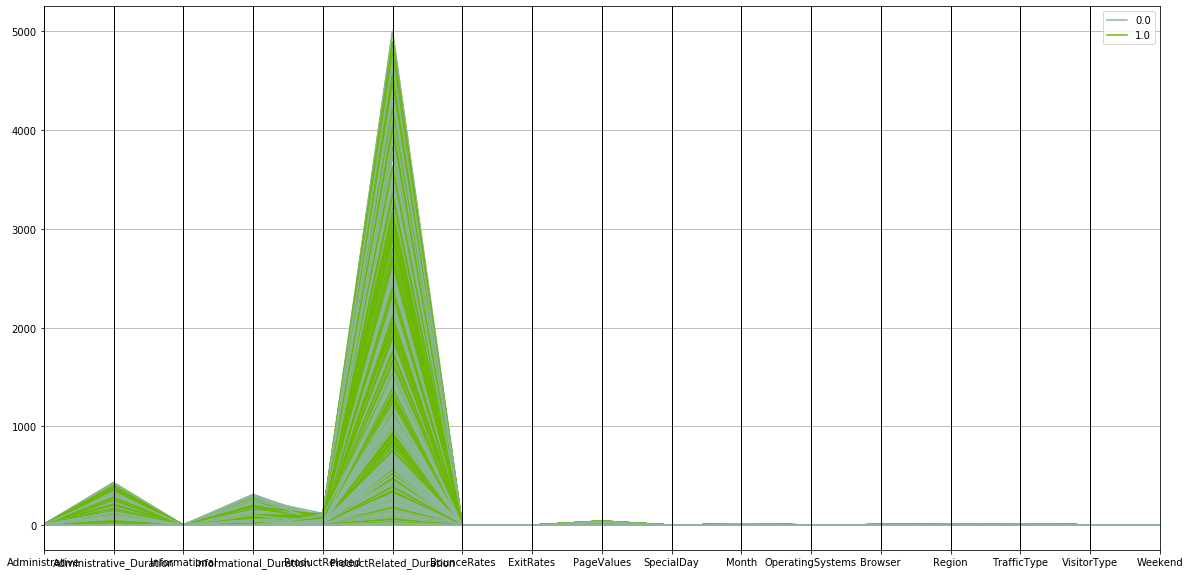

In [42]:
%%time
from pandas.plotting import parallel_coordinates
XsinOutliers = XsinOutliers[indicesIS]
YsinOutliers = YsinOutliers[indicesIS]

datos = np.hstack((XsinOutliers, YsinOutliers.reshape(-1,1)))

# Se crean los índices de los ejemplos
indice = list(range(0,len(XsinOutliers)))

# Se obtienen los nombres de las variables (entrada y salida)
columnas = list(datos_ok.columns[:-1])
columnas.append('clase')

# Se genera el DataFrame para poder aplicar la función parallel_coordinates
df = pd.DataFrame(data = datos, index=indice, columns=columnas)

# Se aplica la función parallel_coordinates sobre el DataFrame generado y usando la Clase como variable de discriminación
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df,class_column='clase')

como podemos ver, la grafica no nos aporta mucha informacion, por lo tanto, seleccionaremos las variables mas importantes con la ayuda de la libreria feature_selection.

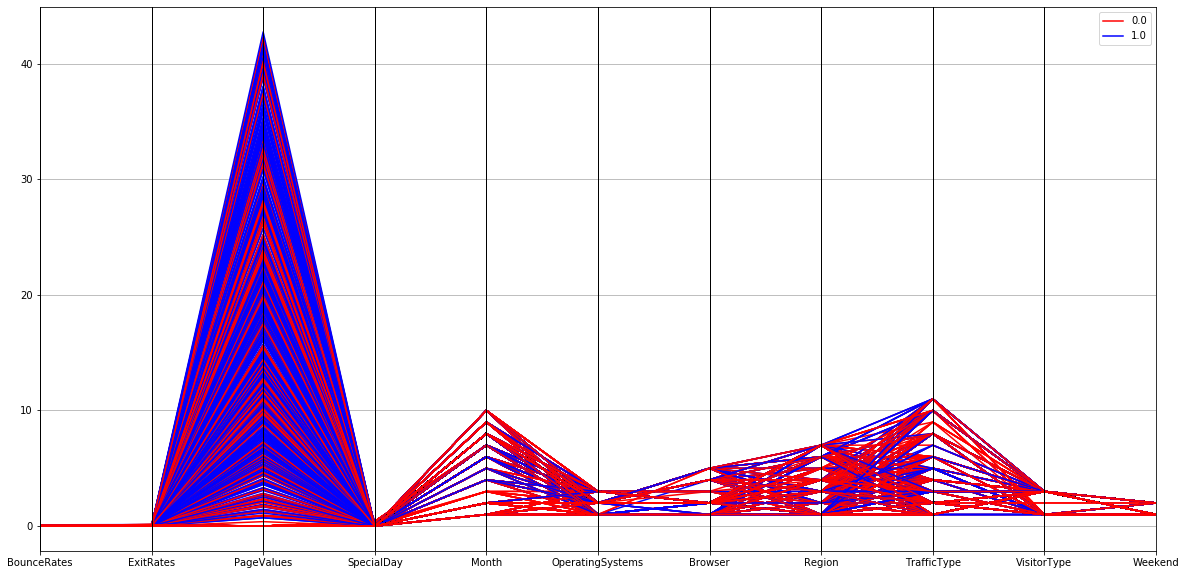

In [48]:
df = pd.DataFrame(data = datos, index=indice, columns=columnas)
df = df.drop(columns = ['ProductRelated_Duration','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated'])
# Se aplica la función parallel_coordinates sobre el DataFrame generado y usando la Clase como variable de discriminación
plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df,class_column='clase',color=['r','b'])

vamos a buscar los mejores variables para DT:

In [49]:
np.random.seed(12)
semilla = 123

clf = tree.DecisionTreeClassifier()

model = SelectFromModel(estimator=clf)
model.fit(XsinOutliers, YsinOutliers)

X_new = model.transform(XsinOutliers)

booleanas =  model.get_support()

# Se obtienen los nombres de las variables seleccionadas
variablesSeleccionadasDT = [datos_ok.columns[:-1][i] for i in range(len(datos_ok.columns)-1) if booleanas[i]==True]
print("Las variables seleccionadas son:", variablesSeleccionadasDT)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, YsinOutliers, train_size=0.7)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predicción de las clases de los datos de entrenamiento transformados
prediccionesTrain = clf.predict(X_train)
prediccionesTest = clf.predict(X_test)

# Se obtiene el accuracy en enrenamiento del nuevo árbol
accTrainDTfs =  round(metrics.accuracy_score(y_train,prediccionesTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDTfs))

# Obtenición del rendimiento con los datos de test
accTestDTfs =  round(metrics.accuracy_score(y_test,prediccionesTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestDTfs))

Las variables seleccionadas son: ['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month']
El rendimiento en entrenamiento con todas las variables es el 100.0%
El rendimiento en test con todas las variables es el 71.41%


vamos a buscar los mejores variables para RF:

In [50]:
np.random.seed(12)
semilla = 123

clf = RandomForestClassifier()

model = SelectFromModel(estimator=clf)
model.fit(XsinOutliers, YsinOutliers)

X_new = model.transform(XsinOutliers)

booleanas =  model.get_support()

# Se obtienen los nombres de las variables seleccionadas
variablesSeleccionadasDT = [datos_ok.columns[:-1][i] for i in range(len(datos_ok.columns)-1) if booleanas[i]==True]
print("Las variables seleccionadas son:", variablesSeleccionadasDT)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, YsinOutliers, train_size=0.7)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Predicción de las clases de los datos de entrenamiento transformados
prediccionesTrain = clf.predict(X_train)
prediccionesTest = clf.predict(X_test)

# Se obtiene el accuracy en enrenamiento del nuevo árbol
accTrainRFfs =  round(metrics.accuracy_score(y_train,prediccionesTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainRFfs))

# Obtenición del rendimiento con los datos de test
accTestRFfs =  round(metrics.accuracy_score(y_test,prediccionesTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestRFfs))

Las variables seleccionadas son: ['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month']
El rendimiento en entrenamiento con todas las variables es el 97.97%
El rendimiento en test con todas las variables es el 77.45%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


vamos a buscar los mejores variables para SVM:

In [51]:
np.random.seed(12)
semilla = 123

clf = LinearSVC()

model = SelectFromModel(estimator=clf)
model.fit(XsinOutliers, YsinOutliers)

X_new = model.transform(XsinOutliers)

booleanas =  model.get_support()

# Se obtienen los nombres de las variables seleccionadas
variablesSeleccionadasDT = [datos_ok.columns[:-1][i] for i in range(len(datos_ok.columns)-1) if booleanas[i]==True]
print("Las variables seleccionadas son:", variablesSeleccionadasDT)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, YsinOutliers, train_size=0.7)

clf = LinearSVC()
clf.fit(X_train,y_train)

# Predicción de las clases de los datos de entrenamiento transformados
prediccionesTrain = clf.predict(X_train)
prediccionesTest = clf.predict(X_test)

# Se obtiene el accuracy en enrenamiento del nuevo árbol
accTrainSVMfs =  round(metrics.accuracy_score(y_train,prediccionesTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainSVMfs))

# Obtenición del rendimiento con los datos de test
accTestSVMfs =  round(metrics.accuracy_score(y_test,prediccionesTest)*100,2)
print('El rendimiento en test con todas las variables es el {}%'.format(accTestSVMfs))

Las variables seleccionadas son: ['Informational', 'BounceRates', 'ExitRates', 'SpecialDay', 'VisitorType', 'Weekend']
El rendimiento en entrenamiento con todas las variables es el 67.97%
El rendimiento en test con todas las variables es el 69.93%


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


El porcentaje de aciertos para SVM se ha mejorado considerablemente, ademas, las variables mas importantes para SVM son completamente distintos que las de arbol de decision y random forest.

# Validacion de modelos

In [71]:
semilla = 12

listaRendimiento = ['precision', 'recall','accuracy','f1','roc_auc']

for tipoRendimiento in listaRendimiento:
    modeloReg = neighbors.KNeighborsClassifier()

    # Se define el grid de parámetros a utilizar
        # Estos parámetros nos darán todas las posibles configuraciones del clasificador KNN
            # Cada combinación de parámetros es una configuración diferente
    grid = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2, 1.5, 3]}

    # Llamada la función GridSearchCV que nos crea todas las cominaciones del grid anterior
    clasificadores = model_selection.GridSearchCV(modeloReg, 
                                                  grid, 
                                                  scoring=tipoRendimiento, 
                                                  cv=10,
                                                  return_train_score=True
                                                 )
    # Entrenamiento de todos los clasificadores con todos los datos contenidos en ion (campos data y target)
    clasificadores.fit(XsinOutliers,YsinOutliers)

    # Se muestra la mejor configuración y su accuracy asociado
    print("mejor",tipoRendimiento,':',clasificadores.best_score_)
    print("mejor configuracion: ",clasificadores.best_params_)
# print('********************************************************************************')

# # Se muestra el accuracy obtenido para cada posible combinación de parámetros
# resultadosMostrar = zip(clasificadores.cv_results_['params'],clasificadores.cv_results_['mean_test_score'],clasificadores.cv_results_['mean_train_score'])
# for params, mean_test_score, mean_train_score in resultadosMostrar:
#     print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
#     print()

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


mejor precision : 0.3804642798757561
mejor configuracion:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
mejor recall : 0.1309748368355529
mejor configuracion:  {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
mejor accuracy : 0.6684649337910741
mejor configuracion:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


validacion para arbol de decision

In [75]:
listaRendimiento = ['precision', 'recall','accuracy','f1','roc_auc']

np.random.seed(12)

for tipoRendimiento in listaRendimiento:
    clfTree = tree.DecisionTreeClassifier()

    param_grid = {'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4]}
    #tipoRendimiento = 'accuracy'
    numParticiones = 10
    devolverResultadosTrain = True


    # Llamada la función GridSearchCV que nos crea todas las cominaciones del grid anterior
    clasificadores = model_selection.GridSearchCV(clfTree, param_grid, scoring=tipoRendimiento, cv=numParticiones,return_train_score=devolverResultadosTrain)

    clasificadores.fit(XsinOutliers,YsinOutliers)

    # Se muestra la mejor configuración y su accuracy asociado
    print("mejor",tipoRendimiento,':',clasificadores.best_score_)
    print("mejor configuracion: ",clasificadores.best_params_)
    #print('********************************************************************************')

    # Se muestra el accuracy obtenido para cada posible combinación de parámetros
    # resultadosMostrar = zip(clasificadores.cv_results_['params'],clasificadores.cv_results_['mean_test_score'],clasificadores.cv_results_['mean_train_score'])
    # for params, mean_test_score, mean_train_score in resultadosMostrar:
    #     print("%0.3f (Train: %0.3f) for %r" % (mean_test_score, mean_train_score, params))
    #     print()

C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


mejor precision : 0.5685122320521699
mejor configuracion:  {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2}
mejor recall : 0.5427233843890293
mejor configuracion:  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


mejor accuracy : 0.7091711623344776
mejor configuracion:  {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3}


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


mejor f1 : 0.5291658517790369
mejor configuracion:  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5}
mejor roc_auc : 0.7142586744136425
mejor configuracion:  {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 15}


C:\Users\Hanwei\Anaconda3\envs\py37machlearn\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
np.random.seed(12)

clf = tree.DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 2, min_samples_split= 3)
clf.fit(XsinOutliers,YsinOutliers)

predTrain = clf.predict(XsinOutliers)
accTrainDTsinOutliers = round(metrics.accuracy_score(YsinOutliers,predTrain)*100,2)
print('El rendimiento en entrenamiento con todas las variables es el {}%'.format(accTrainDTsinOutliers))


El rendimiento en entrenamiento con todas las variables es el 95.78%


In [ ]:
['precision', 'recall']

In [55]:
X_new = model.transform(XsinOutliers)
print(X_new.shape)
pred = clf.predict(X_new[:,5].reshape(-1, 1))
acc = round(metrics.accuracy_score(YsinOutliers,pred)*100,2)
acc


matrizConfusion = metrics.confusion_matrix(YsinOutliers,pred)
print(matrizConfusion)
print(metrics.classification_report(YsinOutliers, pred))

(6601, 6)
[[5713   68]
 [ 322  498]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5781
           1       0.88      0.61      0.72       820

    accuracy                           0.94      6601
   macro avg       0.91      0.80      0.84      6601
weighted avg       0.94      0.94      0.94      6601

